# Data Processing

In [ ]:
import pandas as pd
# Load the dataset
file_path = "heart_disease_combined.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Handling missing values
num_cols = ["trestbps", "chol", "thalach", "oldpeak", "ca"]
df[num_cols] = df[num_cols].apply(lambda col: col.fillna(col.median()))

cat_cols = ["fbs", "restecg", "exang", "slope", "thal"]
df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

In [3]:
print("Nan value after handling")
df.isna().sum()

Nan value after handling


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Convert categorical variables to numeric
df["sex"] = df["sex"].astype(int)
df["fbs"] = df["fbs"].astype(int)
df["exang"] = df["exang"].astype(int)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=["cp", "restecg", "slope", "thal"], drop_first=True)

# Drop the 'dataset' column if it exists
if "dataset" in df.columns:
    df.drop(columns=["dataset"], inplace=True)

In [5]:
from sklearn.preprocessing import StandardScaler
# Scaling numerical features
num_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Save the preprocessed dataset
df.to_csv("preprocessed_heart_disease_data.csv", index=False)

# Display first few rows
print(df.head())

        age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  \
0  1.007386    1  0.705176  0.303643    1  0.489727      0  1.368109   
1  1.432034    1  1.518569  0.789967    0 -1.181478      1  0.611589   
2  1.432034    1 -0.650479  0.266939    0 -0.345875      1  1.651804   
3 -1.752828    1 -0.108217  0.459634    0  1.961979      0  2.502889   
4 -1.328180    0 -0.108217  0.037541    0  1.365120      0  0.517024   

         ca  num  cp_2.0  cp_3.0  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  \
0 -0.361400    0   False   False   False        False         True      False   
1  4.411152    2   False   False    True        False         True       True   
2  2.820301    1   False   False    True        False         True       True   
3 -0.361400    0   False    True   False        False        False      False   
4 -0.361400    0    True   False   False        False         True      False   

   slope_3.0  thal_6.0  thal_7.0  
0       True      True     False  
1      Fal

In [6]:
# Reclassify the 'num' column into 3 classes
# 0 remains 0 (No heart disease)
# 1 remains 1 (Mild heart disease)
# 2, 3, 4 are merged into 2 (Severe heart disease)

df["num"] = df["num"].replace({3: 2, 4: 2})

# Display the updated class distribution
updated_value_counts = df["num"].value_counts()

updated_value_counts



,count
num,
0,411
1,265
2,244


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          920 non-null    float64
 1   sex          920 non-null    int64  
 2   trestbps     920 non-null    float64
 3   chol         920 non-null    float64
 4   fbs          920 non-null    int64  
 5   thalach      920 non-null    float64
 6   exang        920 non-null    int64  
 7   oldpeak      920 non-null    float64
 8   ca           920 non-null    float64
 9   num          920 non-null    int64  
 10  cp_2.0       920 non-null    bool   
 11  cp_3.0       920 non-null    bool   
 12  cp_4.0       920 non-null    bool   
 13  restecg_1.0  920 non-null    bool   
 14  restecg_2.0  920 non-null    bool   
 15  slope_2.0    920 non-null    bool   
 16  slope_3.0    920 non-null    bool   
 17  thal_6.0     920 non-null    bool   
 18  thal_7.0     920 non-null    bool   
dtypes: bool(

# Splitting Data

In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=["num"])  # Remove 'id' since it's not a feature
y = df["num"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((736, 18), (184, 18), (736,), (184,))

# Make ANN Model

In [19]:
# Import necessary libraries for ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Convert target variable to categorical (for multi-class classification)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# Define the ANN model
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))  # First hidden layer with 64 neurons
model.add(Dense(32, activation="relu"))  # Second hidden layer with 32 neurons
model.add(Dense(3, activation="softmax"))  # Output layer (3 classes)

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the ANN model
history = model.fit(X_train, y_train_cat, epochs=150, batch_size=64, validation_data=(X_test, y_test_cat), verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)

test_accuracy


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4102 - loss: 1.1064 - val_accuracy: 0.4946 - val_loss: 1.0849
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4577 - loss: 1.0870 - val_accuracy: 0.5163 - val_loss: 1.0637
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4829 - loss: 1.0559 - val_accuracy: 0.5054 - val_loss: 1.0444
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4740 - loss: 1.0428 - val_accuracy: 0.5054 - val_loss: 1.0274
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4937 - loss: 1.0175 - val_accuracy: 0.5109 - val_loss: 1.0122
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5223 - loss: 0.9995 - val_accuracy: 0.5163 - val_loss: 0.9980
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5451 - loss: 0.9843 - val_accuracy: 0.5326 - val_loss: 0.9849
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5687 - loss: 0.9652 - val_accuracy: 0.538

0.6413043737411499

# Define Different Hyperparameter Values for Tuning

In [10]:
# Define hyperparameter search space
hidden_layer_options = [(32,), (64,), (32, 16), (64, 32)]
activation_options = ["relu", "sigmoid", "tanh"]
optimizer_options = ["adam", "rmsprop", "sgd"]
learning_rate_options = [0.0001, 0.001, 0.01]

# Declare train and test to adress multi class classification


In [11]:
# Convert target variable to categorical (for multi-class classification)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)


# Dfine ANN Model

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from itertools import product
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def create_ann(hidden_layers, activation, optimizer, learning_rate):
    model = Sequential()

    # Input layer
    model.add(Dense(hidden_layers[0], activation=activation, input_shape=(X_train.shape[1],)))

    # Hidden layers
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))

    # Output layer (Softmax for multi-class classification)
    model.add(Dense(3, activation="softmax"))

    # Select optimizer
    if optimizer == "adam":
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == "rmsprop":
        opt = RMSprop(learning_rate=learning_rate)
    else:
        opt = SGD(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

    return model


# Search for the best Result

In [16]:
# Store results
results = []
best_accuracy = 0
best_config = {}

# Iterate over all hyperparameter combinations
for hidden_layers, activation, optimizer, learning_rate in product(hidden_layer_options, activation_options, optimizer_options, learning_rate_options):

    print(f"Testing Configuration: Layers {hidden_layers}, Activation {activation}, Optimizer {optimizer}, Learning Rate {learning_rate}")

    # Create and train model
    ann_model = create_ann(hidden_layers=hidden_layers, activation=activation, optimizer=optimizer, learning_rate=learning_rate)

    history = ann_model.fit(X_train, y_train_cat, epochs=50, batch_size=16, validation_data=(X_test, y_test_cat), verbose=0)

    # Evaluate model on test set
    test_loss, test_accuracy = ann_model.evaluate(X_test, y_test_cat, verbose=0)

    results.append({
        "hidden_layers": str(hidden_layers),
        "activation": activation,
        "optimizer": optimizer,
        "learning_rate": learning_rate,
        "test_accuracy": test_accuracy
    })

    print(f"Test Accuracy: {test_accuracy:.4f}\n")

    # Update best configuration if higher accuracy is found
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_config = {
            "hidden_layers": hidden_layers,
            "activation": activation,
            "optimizer": optimizer,
            "learning_rate": learning_rate
        }

# Convert results to DataFrame and save to CSV
results_df = pd.DataFrame(results)
results_csv_path = "ann_tuning_results.csv"
results_df.to_csv(results_csv_path, index=False)

print("\nBest Configuration Found:")
print(best_config)
print(f"Best Test Accuracy: {best_accuracy:.4f}")

Testing Configuration: Layers (32,), Activation relu, Optimizer adam, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6359

Testing Configuration: Layers (32,), Activation relu, Optimizer adam, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6630

Testing Configuration: Layers (32,), Activation relu, Optimizer adam, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5598

Testing Configuration: Layers (32,), Activation relu, Optimizer rmsprop, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6359

Testing Configuration: Layers (32,), Activation relu, Optimizer rmsprop, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6413

Testing Configuration: Layers (32,), Activation relu, Optimizer rmsprop, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6359

Testing Configuration: Layers (32,), Activation relu, Optimizer sgd, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.2554

Testing Configuration: Layers (32,), Activation relu, Optimizer sgd, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5435

Testing Configuration: Layers (32,), Activation relu, Optimizer sgd, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6522

Testing Configuration: Layers (32,), Activation sigmoid, Optimizer adam, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6304

Testing Configuration: Layers (32,), Activation sigmoid, Optimizer adam, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6413

Testing Configuration: Layers (32,), Activation sigmoid, Optimizer adam, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6467

Testing Configuration: Layers (32,), Activation sigmoid, Optimizer rmsprop, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6250

Testing Configuration: Layers (32,), Activation sigmoid, Optimizer rmsprop, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6467

Testing Configuration: Layers (32,), Activation sigmoid, Optimizer rmsprop, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6630

Testing Configuration: Layers (32,), Activation sigmoid, Optimizer sgd, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.4457

Testing Configuration: Layers (32,), Activation sigmoid, Optimizer sgd, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5272

Testing Configuration: Layers (32,), Activation sigmoid, Optimizer sgd, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6141

Testing Configuration: Layers (32,), Activation tanh, Optimizer adam, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6304

Testing Configuration: Layers (32,), Activation tanh, Optimizer adam, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6739

Testing Configuration: Layers (32,), Activation tanh, Optimizer adam, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5924

Testing Configuration: Layers (32,), Activation tanh, Optimizer rmsprop, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6250

Testing Configuration: Layers (32,), Activation tanh, Optimizer rmsprop, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6413

Testing Configuration: Layers (32,), Activation tanh, Optimizer rmsprop, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5815

Testing Configuration: Layers (32,), Activation tanh, Optimizer sgd, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.3641

Testing Configuration: Layers (32,), Activation tanh, Optimizer sgd, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5870

Testing Configuration: Layers (32,), Activation tanh, Optimizer sgd, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6522

Testing Configuration: Layers (64,), Activation relu, Optimizer adam, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6359

Testing Configuration: Layers (64,), Activation relu, Optimizer adam, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6576

Testing Configuration: Layers (64,), Activation relu, Optimizer adam, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5598

Testing Configuration: Layers (64,), Activation relu, Optimizer rmsprop, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6250

Testing Configuration: Layers (64,), Activation relu, Optimizer rmsprop, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6576

Testing Configuration: Layers (64,), Activation relu, Optimizer rmsprop, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5272

Testing Configuration: Layers (64,), Activation relu, Optimizer sgd, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.3804

Testing Configuration: Layers (64,), Activation relu, Optimizer sgd, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6141

Testing Configuration: Layers (64,), Activation relu, Optimizer sgd, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6522

Testing Configuration: Layers (64,), Activation sigmoid, Optimizer adam, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6141

Testing Configuration: Layers (64,), Activation sigmoid, Optimizer adam, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6141

Testing Configuration: Layers (64,), Activation sigmoid, Optimizer adam, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5924

Testing Configuration: Layers (64,), Activation sigmoid, Optimizer rmsprop, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6304

Testing Configuration: Layers (64,), Activation sigmoid, Optimizer rmsprop, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6359

Testing Configuration: Layers (64,), Activation sigmoid, Optimizer rmsprop, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6359

Testing Configuration: Layers (64,), Activation sigmoid, Optimizer sgd, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.4891

Testing Configuration: Layers (64,), Activation sigmoid, Optimizer sgd, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.4837

Testing Configuration: Layers (64,), Activation sigmoid, Optimizer sgd, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6196

Testing Configuration: Layers (64,), Activation tanh, Optimizer adam, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6359

Testing Configuration: Layers (64,), Activation tanh, Optimizer adam, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6630

Testing Configuration: Layers (64,), Activation tanh, Optimizer adam, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5598

Testing Configuration: Layers (64,), Activation tanh, Optimizer rmsprop, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6196

Testing Configuration: Layers (64,), Activation tanh, Optimizer rmsprop, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6413

Testing Configuration: Layers (64,), Activation tanh, Optimizer rmsprop, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5978

Testing Configuration: Layers (64,), Activation tanh, Optimizer sgd, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.3804

Testing Configuration: Layers (64,), Activation tanh, Optimizer sgd, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5652

Testing Configuration: Layers (64,), Activation tanh, Optimizer sgd, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6413

Testing Configuration: Layers (32, 16), Activation relu, Optimizer adam, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6522

Testing Configuration: Layers (32, 16), Activation relu, Optimizer adam, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6576

Testing Configuration: Layers (32, 16), Activation relu, Optimizer adam, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5652

Testing Configuration: Layers (32, 16), Activation relu, Optimizer rmsprop, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6141

Testing Configuration: Layers (32, 16), Activation relu, Optimizer rmsprop, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6359

Testing Configuration: Layers (32, 16), Activation relu, Optimizer rmsprop, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6304

Testing Configuration: Layers (32, 16), Activation relu, Optimizer sgd, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.3207

Testing Configuration: Layers (32, 16), Activation relu, Optimizer sgd, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5815

Testing Configuration: Layers (32, 16), Activation relu, Optimizer sgd, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6793

Testing Configuration: Layers (32, 16), Activation sigmoid, Optimizer adam, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5326

Testing Configuration: Layers (32, 16), Activation sigmoid, Optimizer adam, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6522

Testing Configuration: Layers (32, 16), Activation sigmoid, Optimizer adam, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6304

Testing Configuration: Layers (32, 16), Activation sigmoid, Optimizer rmsprop, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5598

Testing Configuration: Layers (32, 16), Activation sigmoid, Optimizer rmsprop, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6413

Testing Configuration: Layers (32, 16), Activation sigmoid, Optimizer rmsprop, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6033

Testing Configuration: Layers (32, 16), Activation sigmoid, Optimizer sgd, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.4402

Testing Configuration: Layers (32, 16), Activation sigmoid, Optimizer sgd, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.4457

Testing Configuration: Layers (32, 16), Activation sigmoid, Optimizer sgd, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.4620

Testing Configuration: Layers (32, 16), Activation tanh, Optimizer adam, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6087

Testing Configuration: Layers (32, 16), Activation tanh, Optimizer adam, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6359

Testing Configuration: Layers (32, 16), Activation tanh, Optimizer adam, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5815

Testing Configuration: Layers (32, 16), Activation tanh, Optimizer rmsprop, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6304

Testing Configuration: Layers (32, 16), Activation tanh, Optimizer rmsprop, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6413

Testing Configuration: Layers (32, 16), Activation tanh, Optimizer rmsprop, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5870

Testing Configuration: Layers (32, 16), Activation tanh, Optimizer sgd, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.3587

Testing Configuration: Layers (32, 16), Activation tanh, Optimizer sgd, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6141

Testing Configuration: Layers (32, 16), Activation tanh, Optimizer sgd, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6522

Testing Configuration: Layers (64, 32), Activation relu, Optimizer adam, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6467

Testing Configuration: Layers (64, 32), Activation relu, Optimizer adam, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6304

Testing Configuration: Layers (64, 32), Activation relu, Optimizer adam, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5761

Testing Configuration: Layers (64, 32), Activation relu, Optimizer rmsprop, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6467

Testing Configuration: Layers (64, 32), Activation relu, Optimizer rmsprop, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6359

Testing Configuration: Layers (64, 32), Activation relu, Optimizer rmsprop, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5707

Testing Configuration: Layers (64, 32), Activation relu, Optimizer sgd, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.3967

Testing Configuration: Layers (64, 32), Activation relu, Optimizer sgd, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5707

Testing Configuration: Layers (64, 32), Activation relu, Optimizer sgd, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6522

Testing Configuration: Layers (64, 32), Activation sigmoid, Optimizer adam, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6359

Testing Configuration: Layers (64, 32), Activation sigmoid, Optimizer adam, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6196

Testing Configuration: Layers (64, 32), Activation sigmoid, Optimizer adam, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6087

Testing Configuration: Layers (64, 32), Activation sigmoid, Optimizer rmsprop, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6304

Testing Configuration: Layers (64, 32), Activation sigmoid, Optimizer rmsprop, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6522

Testing Configuration: Layers (64, 32), Activation sigmoid, Optimizer rmsprop, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6522

Testing Configuration: Layers (64, 32), Activation sigmoid, Optimizer sgd, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5163

Testing Configuration: Layers (64, 32), Activation sigmoid, Optimizer sgd, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.4457

Testing Configuration: Layers (64, 32), Activation sigmoid, Optimizer sgd, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5652

Testing Configuration: Layers (64, 32), Activation tanh, Optimizer adam, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6196

Testing Configuration: Layers (64, 32), Activation tanh, Optimizer adam, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6087

Testing Configuration: Layers (64, 32), Activation tanh, Optimizer adam, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5707

Testing Configuration: Layers (64, 32), Activation tanh, Optimizer rmsprop, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6413

Testing Configuration: Layers (64, 32), Activation tanh, Optimizer rmsprop, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6359

Testing Configuration: Layers (64, 32), Activation tanh, Optimizer rmsprop, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5707

Testing Configuration: Layers (64, 32), Activation tanh, Optimizer sgd, Learning Rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.4891

Testing Configuration: Layers (64, 32), Activation tanh, Optimizer sgd, Learning Rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.5870

Testing Configuration: Layers (64, 32), Activation tanh, Optimizer sgd, Learning Rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6359


Best Configuration Found:
{'hidden_layers': (32, 16), 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.01}
Best Test Accuracy: 0.6793


# Make Final model using Best Hyperparameter

In [20]:
# Re-import necessary libraries for evaluation
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Train the final model with the best configuration
final_model = Sequential()
final_model.add(Dense(32, activation="relu", input_shape=(X_train.shape[1],)))
final_model.add(Dense(16, activation="relu"))
final_model.add(Dense(3, activation="softmax"))  # Output layer for multi-class classification

# Use the best optimizer and learning rate
final_optimizer = SGD(learning_rate=0.01)

# Compile the model
final_model.compile(optimizer=final_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Train the final model
final_history = final_model.fit(X_train, y_train_cat, epochs=100, batch_size=16, validation_data=(X_test, y_test_cat), verbose=1)

# Evaluate on test set
final_test_loss, final_test_accuracy = final_model.evaluate(X_test, y_test_cat, verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4308 - loss: 1.2016 - val_accuracy: 0.4620 - val_loss: 1.0512
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4727 - loss: 1.0378 - val_accuracy: 0.5435 - val_loss: 0.9746
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5796 - loss: 0.9566 - val_accuracy: 0.5652 - val_loss: 0.9266
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6056 - loss: 0.9178 - val_accuracy: 0.6033 - val_loss: 0.8939
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6296 - loss: 0.8692 - val_accuracy: 0.6033 - val_loss: 0.8718
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6475 - loss: 0.8367 - val_accuracy: 0.6196 - val_loss: 0.8560
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6630 - loss: 0.8210 - val_accuracy: 0.6141 - val_loss: 0.8445
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6642 - loss: 0.7807 - val_accuracy: 0.6141 - val_loss: 0.8

# Evaluation of Best Model

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


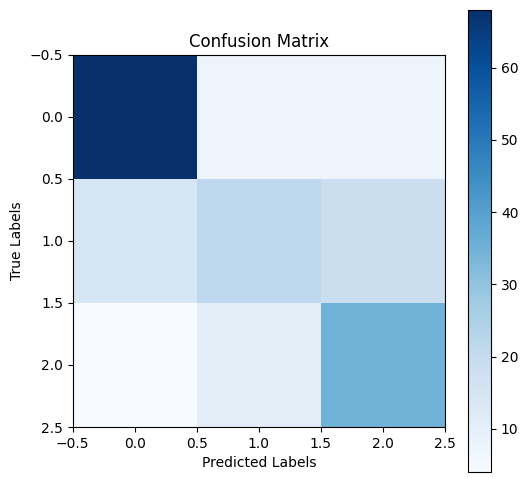

Final Model Test Accuracy: 0.6739

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        82
           1       0.55      0.40      0.46        53
           2       0.58      0.71      0.64        49

    accuracy                           0.67       184
   macro avg       0.64      0.65      0.64       184
weighted avg       0.67      0.67      0.66       184



In [21]:
# Predictions
y_pred_probs = final_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Classification Report
class_report = classification_report(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Final Model Test Accuracy:", round(final_test_accuracy, 4))
print("\nClassification Report:\n", class_report)

In [22]:
final_model.save("final_ann_model.h5")